### Traduzindo as Colunas para Português

In [47]:
import pandas as pd

# Carregue o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('Cleaned_Laptop_data.csv')

# Crie um dicionário com os novos nomes em português
nomes_traduzidos = {
    'brand': 'marca',
    'model': 'modelo',
    'processor_brand': 'marca_processador',
    'processor_name': 'nome_processador',
    'processor_gnrtn': 'geração_processador',
    'ram_gb': 'ram_gb',
    'ram_type': 'tipo_ram',
    'ssd': 'ssd',
    'hdd': 'hdd',
    'os': 'sistema_operacional',
    'os_bit': 'arquitetura_sistema',
    'graphic_card_gb': 'placa_grafica_gb',
    'weight': 'peso',
    'display_size': 'tamanho_tela',
    'warranty': 'garantia',
    'Touchscreen': 'tela_touch',
    'msoffice': 'microsoft_office',
    'latest_price': 'preco_atual',
    'old_price': 'preco_antigo',
    'discount': 'desconto',
    'star_rating': 'classificacao',
    'ratings': 'avaliacoes',
    'reviews': 'comentarios'
}

# Renomeie as colunas usando o método rename do pandas
df.rename(columns=nomes_traduzidos, inplace=True)

# Exiba as colunas atualizadas
print("Colunas atualizadas:", df.columns)





Colunas atualizadas: Index(['marca', 'modelo', 'marca_processador', 'nome_processador',
       'geração_processador', 'ram_gb', 'tipo_ram', 'ssd', 'hdd',
       'sistema_operacional', 'arquitetura_sistema', 'placa_grafica_gb',
       'peso', 'tamanho_tela', 'garantia', 'tela_touch', 'microsoft_office',
       'preco_atual', 'preco_antigo', 'desconto', 'classificacao',
       'avaliacoes', 'comentarios'],
      dtype='object')


### Converter os preços de Rupias indianas para Reais

In [48]:
# Renomeie as colunas usando o método rename do pandas
df.rename(columns=nomes_traduzidos, inplace=True)

# Exiba as colunas atualizadas
print("Colunas atualizadas:", df.columns)

# Taxa de câmbio de Rupia Indiana para Real (exemplo, substitua pelo valor atual)
taxa_cambio = 0.059

# Converta as colunas de preço para Real
df['preco_atual_real'] = df['preco_atual'] * taxa_cambio
df['preco_antigo_real'] = df['preco_antigo'] * taxa_cambio

# Exiba as colunas atualizadas
print(df[['preco_atual_real', 'preco_antigo_real']])

# Salve o DataFrame de volta para um novo arquivo CSV se desejar
df.to_csv('seuarquivo_atualizado.csv', index=False)




Colunas atualizadas: Index(['marca', 'modelo', 'marca_processador', 'nome_processador',
       'geração_processador', 'ram_gb', 'tipo_ram', 'ssd', 'hdd',
       'sistema_operacional', 'arquitetura_sistema', 'placa_grafica_gb',
       'peso', 'tamanho_tela', 'garantia', 'tela_touch', 'microsoft_office',
       'preco_atual', 'preco_antigo', 'desconto', 'classificacao',
       'avaliacoes', 'comentarios'],
      dtype='object')
     preco_atual_real  preco_antigo_real
0             1474.41            1934.61
1             1155.81            1258.17
2             1179.41            1651.41
3             1267.91            1651.41
4             1474.41            1975.91
..                ...                ...
891           8554.41           11504.41
892           8849.41               0.00
893           8436.41               0.00
894           2300.41            2831.41
895           3391.91            4625.60

[896 rows x 2 columns]


### Converter a coluna 'desconto' para formato decimal 

In [49]:
# Converta a coluna 'desconto' para formato decimal (dividindo por 100)
df['desconto'] = df['desconto'] / 100

# Exiba as colunas atualizadas
print(df['desconto'])

# Taxa de câmbio de Rupia Indiana para Real (exemplo, substitua pelo valor atual)
taxa_cambio = 0.059

# Converta as colunas de preço para Real
df['preco_atual_real'] = df['preco_atual'] * taxa_cambio
df['preco_antigo_real'] = df['preco_antigo'] * taxa_cambio

# Exiba as colunas atualizadas
print(df[['preco_atual_real', 'preco_antigo_real']])

# Salve o DataFrame de volta para um novo arquivo CSV se desejar
df.to_csv('seuarquivo_atualizado.csv', index=False)

0     0.23
1     0.08
2     0.28
3     0.23
4     0.25
      ... 
891   0.25
892   0.00
893   0.00
894   0.18
895   0.26
Name: desconto, Length: 896, dtype: float64
     preco_atual_real  preco_antigo_real
0             1474.41            1934.61
1             1155.81            1258.17
2             1179.41            1651.41
3             1267.91            1651.41
4             1474.41            1975.91
..                ...                ...
891           8554.41           11504.41
892           8849.41               0.00
893           8436.41               0.00
894           2300.41            2831.41
895           3391.91            4625.60

[896 rows x 2 columns]


### Média de Preço das Marcas

Média do preço por marca:
 marca
Acer         4261.24
Alienware   15184.53
Apple        8950.76
Asus         4674.08
Avita        3289.79
Dell         3659.77
Hp           4235.16
Iball         825.41
Infinix      2411.03
Lenovo       4295.22
Lg           4495.21
Mi           3377.16
Microsoft    5746.19
Msi          5750.95
Nokia        2990.71
Realme       3082.43
Redmibook    2575.74
Samsung      2300.41
Smartron     2929.74
Vaio         3285.71
Name: preco_atual_real, dtype: float64


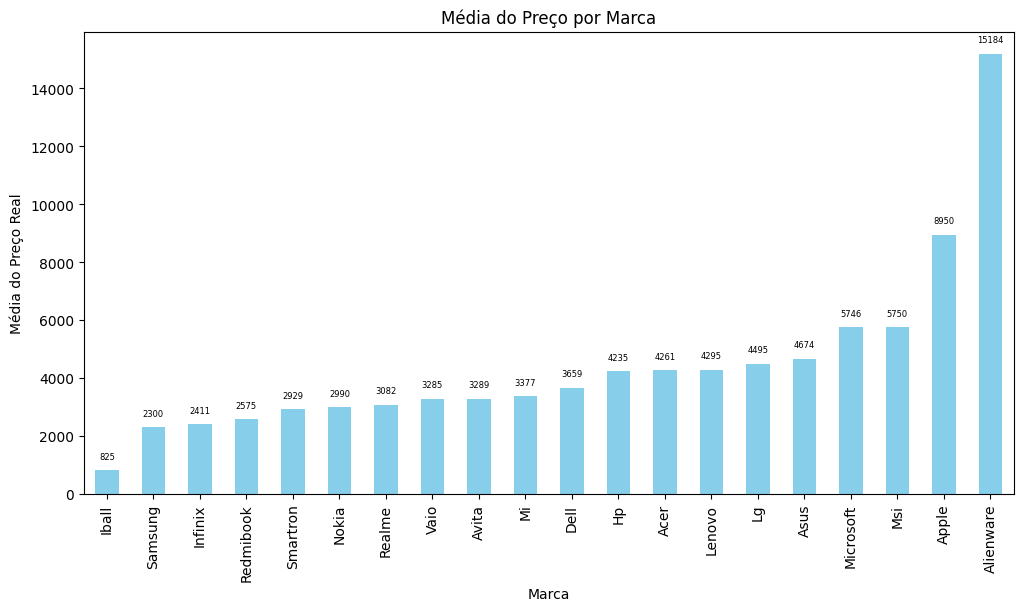

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('seuarquivo_atualizado.csv')

# Padroniza os valores da coluna 'marca' para minúsculas e capitaliza a primeira letra
df['marca'] = df['marca'].str.lower().str.capitalize()

# Calcula a média do preço das marcas
media_preco_por_marca = df.groupby('marca')['preco_atual_real'].mean()

# Exibe a média do preço das marcas
pd.set_option('display.float_format', '{:.2f}'.format)
print("Média do preço por marca:\n", media_preco_por_marca)

# Gráfico de barras para visualizar a média do preço por marca
plt.figure(figsize=(12, 6))
ax = media_preco_por_marca.sort_values().plot(kind='bar', color='skyblue')

# Adiciona os valores em cada barra com fonte menor e sem casas decimais
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=6)

plt.title('Média do Preço por Marca')
plt.xlabel('Marca')
plt.ylabel('Média do Preço Real')
plt.show()



In [51]:
# SQLAlchemy: Biblioteca em Python para trabalhar com bancos de dados relacionais, oferecendo uma camada de abstração sobre diferentes DBMS (Data Base Management System)

# create_engine: Função do SQLAlchemy para criar uma instância de "engine", um objeto que gerencia a conexão com um banco de dados e executa comandos SQL.

import mysql.connector
from sqlalchemy import create_engine
import pandas as pd

# Configurações do banco de dados
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'natasha57',
    'database': 'projetos'
}

# Conectar ao MySQL usando SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Lista de nomes de arquivos CSV e nomes correspondentes de tabelas
mapeamento_arquivos_tabelas = {
    'seuarquivo_atualizado.csv': 'Notebooks_Vendidos'
}

# Loop sobre cada arquivo e sua tabela correspondente
for nome_arquivo_csv, nome_tabela in mapeamento_arquivos_tabelas.items():
    try:
        # Ler dados do arquivo CSV usando pandas
        dados_csv = pd.read_csv(nome_arquivo_csv)

        # Remover espaços extras no nome das colunas
        dados_csv.columns = dados_csv.columns.str.strip()

        # Criar a tabela no MySQL (se ela não existir)
        dados_csv.head(0).to_sql(nome_tabela, con=engine, if_exists='replace', index=False)

        # Inserir dados no MySQL
        dados_csv.to_sql(nome_tabela, con=engine, if_exists='append', index=False)

        # Exibir os dados
        print(f'Dados do arquivo {nome_arquivo_csv} inseridos com sucesso na tabela {nome_tabela}')

    # Tratamento de exceções específicas.
    # Se o arquivo CSV não for encontrado, a exceção FileNotFoundError será capturada.
    # A variável 'e' armazena a exceção capturada, permitindo o acesso às informações sobre a exceção.
    except FileNotFoundError as e:
        print(f"Erro: Arquivo {nome_arquivo_csv} não encontrado. Verifique o nome do arquivo. Detalhes do erro: {e}")

    # Tratamento de exceções genéricas.
    # Se ocorrer qualquer outra exceção, ela será capturada pelo bloco except Exception.
    except Exception as e:
        print(f"Erro ao inserir dados do arquivo {nome_arquivo_csv} no MySQL: {e}")

# Bloco finally.
# Independentemente de ocorrer uma exceção ou não, o bloco finally é executado.
# No caso, é usado para garantir que a conexão com o MySQL seja fechada.
    finally:
        engine.dispose()  # Fechar a conexão

Dados do arquivo seuarquivo_atualizado.csv inseridos com sucesso na tabela Notebooks_Vendidos
